# **Báo cáo thường kỳ 1**

## Tên: Nguyễn Mạnh Hà.
## Tên: Trần Chí Hùng.
## Tên: Lê Ngọc Tồn.

# Likelihood


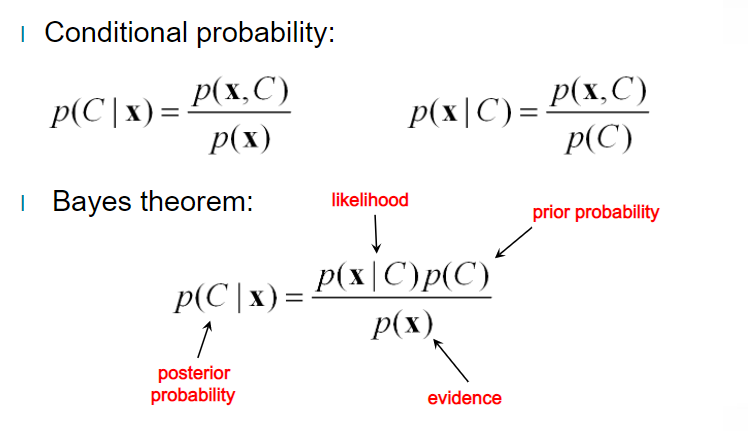

Tính likelihood, Posterior và ve biểu đồ: cho tập dữ liệu cho trước D với 2 lớp hoặc 3 lớp w1, w2, w3.

Ở đây sử dụng 2 lớp w1, w2, Phát sinh ngẫu nhiên 6 giá trị mỗi lớp từ 1-10

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [ ]:
#w11 = np.random.randint(1,10,6)
w11 = [1,1,2,2,2]
w1=list(w11)

#w22 = np.random.randint(1,10,6)
w22 = [2,3,3,3,4]
w2=list(w22)
print(w1)
print(w2)

[1, 1, 2, 2, 2]
[2, 3, 3, 3, 4]


In [ ]:
#Tìm số chung của 2 class
w1_w2 = set(w1)|set(w2)
print(w1_w2)

{1, 2, 3, 4}


In [ ]:
#Đếm số lượng của mỗi phần tử trong class w1,w2
s1 = {x: w1.count(x) for x in w1}
s2 = {x: w2.count(x) for x in w2}
#Xác xuất P(w1),P(w2)
p_w1 = len(w1)/(len(w1) + len(w2))
p_w2 = len(w2)/(len(w1) + len(w2))
#Tổng số phần tử của 2 lớp
w = len(w1)+len(w2)

In [ ]:
print(s1)
print(s2)
print(p_w1,p_w2)
print(w)

{1: 2, 2: 3}
{2: 1, 3: 3, 4: 1}
0.5 0.5
10


In [ ]:
#Xác xuất điều kiện p(A|B) = p(A,B)/P(B)
def likelihood_w1(x, p_w,w): # x:Hằng số,tham số cần tính
    return (s1.get(x)/w)/ p_w  #p_w:Xác xuất của class P(w1)
                                #w tổng độ dài của 2 lớp
def likelihood_w2(x, p_w,w):
      return (s2.get(x) / w) / p_w

In [ ]:
likelihood_a = {}
likelihood_b = {}
for i in list(set(w1)):
    likelihood_a[i] = likelihood_w1(i,p_w1,w)
for i in list(set(w2)):
    likelihood_b[i] = likelihood_w2(i,p_w2,w)

In [ ]:
print(likelihood_a)
print(likelihood_b)

{1: 0.4, 2: 0.6}
{2: 0.2, 3: 0.6, 4: 0.2}


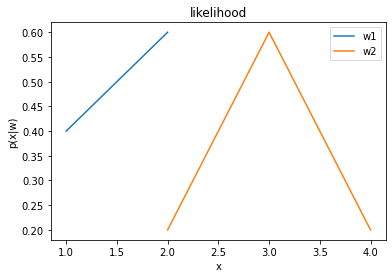

In [ ]:
plt.plot(list(likelihood_a.keys()),list(likelihood_a.values()))
plt.plot(list(likelihood_b.keys()),list(likelihood_b.values()))
plt.xlabel('x')
plt.ylabel('p(x|w)')
plt.title('likelihood')
plt.legend(['w1','w2'])

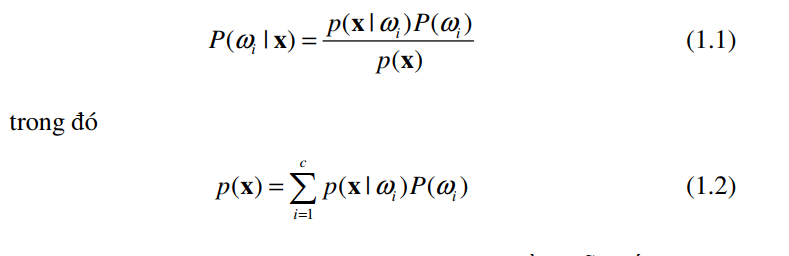

In [ ]:
def posterio_w1(x,p_w,w):
    if(s2.get(x)!=None):
        a = likelihood_w1(x,p_w,w)
        b = (a*p_w)/((s1.get(x)+s2.get(x))/w)
    else:
        a = likelihood_w1(x,p_w,w)
        b = (a*p_w)/((s1.get(x))/w)
    return b
def posterio_w2(x,p_w,w):
    if(s1.get(x)!=None):
        a = likelihood_w2(x,p_w,w)
        b = (a*p_w)/((s1.get(x)+s2.get(x))/w)
    else:
        a = likelihood_w2(x,p_w,w)
        b = (a*p_w2)/((s2.get(x))/w)
    return b

In [ ]:
posterio_a = {}
posterio_b = {}
for i in list(set(w1)):
    posterio_a[i] = round(posterio_w1(i,p_w1,w),2)
for i in list(set(w2)):
    posterio_b[i] = round(posterio_w2(i,p_w2,w),2)

In [ ]:
print(posterio_a,posterio_b)

{1: 1.0, 2: 0.75} {2: 0.25, 3: 1.0, 4: 1.0}


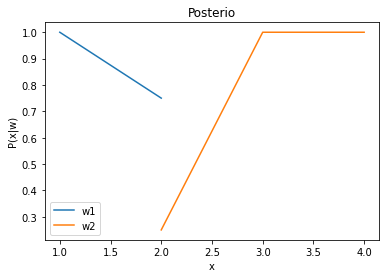

In [ ]:
plt.plot(list(posterio_a.keys()),list(posterio_a.values()))
plt.plot(list(posterio_b.keys()),list(posterio_b.values()))
plt.xlabel('x')
plt.ylabel('P(x|w)')
plt.title('Posterio')
plt.legend(['w1','w2'])